In [2]:
import pandas as pd  
import numpy as np
import sklearn as skl 
# importing all basic librabries

In [3]:
import h2o
h2o.init() #h2o initialization

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\NAVANE~1\AppData\Local\Temp\tmpco_5s5pw
  JVM stdout: C:\Users\NAVANE~1\AppData\Local\Temp\tmpco_5s5pw\h2o_Navaneethan_started_from_python.out
  JVM stderr: C:\Users\NAVANE~1\AppData\Local\Temp\tmpco_5s5pw\h2o_Navaneethan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,30 days
H2O cluster name:,H2O_from_python_Navaneethan_nb1miv
H2O cluster total nodes:,1
H2O cluster free memory:,1.755 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
train=h2o.import_file('F:\H2o\mnist_train.csv')
test = h2o.import_file('F:\H2o\mnist_test.csv') #importing both train and test datasets

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train.describe() #describing train data
test.describe()  #describing test data
label_df_train=train["label"]
label_df_test=test["label"]

Rows:60000
Cols:785




label 1x1 1x2 1x3 1x4 1x5 1x6 1x7 1x8 1x9 1x10 1x11 1x12 1x13 1x14 1x15 1x16 1x17 1x18 1x19 1x20 1x21 1x22 1x23 1x24 1x25 1x26 1x27 1x28 2x1 2x2 2x3 2x4 2x5 2x6 2x7 2x8 2x9 2x10 2x11 2x12 2x13 2x14 2x15 2x16 2x17 2x18 2x19 2x20 2x21 2x22 2x23 2x24 2x25 2x26 2x27 2x28 3x1 3x2 3x3 3x4 3x5 3x6 3x7 3x8 3x9 3x10 3x11 3x12 3x13 3x14 3x15 3x16 3x17 3x18 3x19 3x20 3x21 3x22 3x23 3x24 3x25 3x26 3x27 3x28 4x1 4x2 4x3 4x4 4x5 4x6 4x7 4x8 4x9 4x10 4x11 4x12 4x13 4x14 4x15 4x16 4x17 4x18 4x19 4x20 4x21 4x22 4x23 4x24 4x25 4x26 4x27 4x28 5x1 5x2 5x3 5x4 5x5 5x6 5x7 5x8 5x9 5x10 5x11 5x12 5x13 5x14 5x15 5x16 5x17 5x18 5x19 5x20 5x21 5x22 5x23 5x24 5x25 5x26 5x27 5x28 6x1 6x2 6x3 6x4 6x5 6x6 6x7 6x8 6x9 6x10 6x11 6x12 6x13 6x14 6x15 6x16 6x17 6x18 6x19 6x20 6x21 6x22 6x23 6x24 6x25 6x26 6x27 6x28 7x1 7x2 7x3 7x4 7x5 7x6 7x7 7x8 7x9 7x10 7x11 7x12 7x13 7x14 7x15 7x16 7x17 7x18 7x19 7x20 7x21 7x22 7x23 7x24 7x25 7x26 7x27 7x28 8x1 8x2 8x3 8x4 8x5 8x6 8x7 8x8 8x9 8x10 8x11 8x12 8x13 8x14 8x15 8x16 8x17 8x18 8x19 8x20 8x21 8x22 8x23 8x24 8x25 8x26 8x27 8x28 9x1 9x2 9x3 9x4 9x5 9x6 9x7 9x8 9x9 9x10 9x11 9x12 9x13 9x14 9x15 9x16 9x17 9x18 9x19 9x20 9x21 9x22 9x23 9x24 9x25 9x26 9x27 9x28 10x1 10x2 10x3 10x4 10x5 10x6 10x7 10x8 10x9 10x10 10x11 10x12 10x13 10x14 10x15 10x16 10x17 10x18 10x19 10x20 10x21 10x22 10x23 10x24 10x25 10x26 10x27 10x28 11x1 11x2 11x3 11x4 11x5 11x6 11x7 11x8 11x9 11x10 11x11 11x12 11x13 11x14 11x15 11x16 11x17 11x18 11x19 11x20 11x21 11x22 11x23 11x24 11x25 11x26 11x27 11x28 12x1 12x2 12x3 12x4 12x5 12x6 12x7 12x8 12x9 12x10 12x11 12x12 12x13 12x14 12x15 12x16 12x17 12x18 12x19 12x20 12x21 12x22 12x23 12x24 12x25 12x26 12x27 12x28 13x1 13x2 13x3 13x4 13x5 13x6 13x7 13x8 13x9 13x10 13x11 13x12 13x13 13x14 13x15 13x16 13x17 13x18 13x19 13x20 13x21 13x22 13x23 13x24 13x25 13x26 13x27 13x28 14x1 14x2 14x3 14x4 14x5 14x6 14x7 14x8 14x9 14x10 14x11 14x12 14x13 14x14 14x15 14x16 14x17 14x18 14x19 14x20 14x21 14x22 14x23 14x24 14x25 14x26 14x27 14x28 15x1 15x2 15x3 15x4 15x5 15x6 15x7 15x8 15x9 15x10 15x11 15x12 15x13 15x14 15x15 15x16 15x17 15x18 15x19 15x20 15x21 15x22 15x23 15x24 15x25 15x26 15x27 15x28 16x1 16x2 16x3 16x4 16x5 16x6 16x7 16x8 16x9 16x10 16x11 16x12 16x13 16x14 16x15 16x16 16x17 16x18 16x19 16x20 16x21 16x22 16x23 16x24 16x25 16x26 16x27 16x28 17x1 17x2 17x3 17x4 17x5 17x6 17x7 17x8 17x9 17x10 17x11 17x12 17x13 17x14 17x15 17x16 17x17 17x18 17x19 17x20 17x21 17x22 17x23 17x24 17x25 17x26 17x27 17x28 18x1 18x2 18x3 18x4 18x5 18x6 18x7 18x8 18x9 18x10 18x11 18x12 18x13 18x14 18x15 18x16 18x17 18x18 18x19 18x20 18x21 18x22 18x23 18x24 18x25 18x26 18x27 18x28 19x1 19x2 19x3 19x4 19x5 19x6 19x7 19x8 19x9 19x10 19x11 19x12 19x13 19x14 19x15 19x16 19x17 19x18 19x19 19x20 19x21 19x22 19x23 19x24 19x25 19x26 19x27 19x28 20x1 20x2 20x3 20x4 20x5 20x6 20x7 20x8 20x9 20x10 20x11 20x12 20x13 20x14 20x15 20x16 20x17 20x18 20x19 20x20 20x21 20x22 20x23 20x24 20x25 20x26 20x27 20x28 21x1 21x2 21x3 21x4 21x5 21x6 21x7 21x8 21x9 21x10 21x11 21x12 21x13 21x14 21x15 21x16 21x17 21x18 21x19 21x20 21x21 21x22 21x23 21x24 21x25 21x26 21x27 21x28 22x1 22x2 22x3 22x4 22x5 22x6 22x7 22x8 22x9 22x10 22x11 22x12 22x13 22x14 22x15 22x16 22x17 22x18 22x19 22x20 22x21 22x22 22x23 22x24 22x25 22x26 22x27 22x28 23x1 23x2 23x3 23x4 23x5 23x6 23x7 23x8 23x9 23x10 23x11 23x12 23x13 23x14 23x15 23x16 23x17 23x18 23x19 23x20 23x21 23x22 23x23 23x24 23x25 23x26 23x27 23x28 24x1 24x2 24x3 24x4 24x5 24x6 24x7 24x8 24x9 24x10 24x11 24x12 24x13 24x14 24x15 24x16 24x17 24x18 24x19 24x20 24x21 24x22 24x23 24x24 24x25 24x26 24x27 24x28 25x1 25x2 25x3 25x4 25x5 25x6 25x7 25x8 25x9 25x10 25x11 25x12 25x13 25x14 25x15 25x16 25x17 25x18 25x19 25x20 25x21 25x22 25x23 25x24 25x25 25x26 25x27 25x28 26x1 26x2 26x3 26x4 26x5 26x6 26x7 26x8 26x9 26x10 26x11 26x12 26x13 26x14 26x15 26x16 26x17 26x18 26x19 26x20 26x21 26x22 26x23 26x24 26x25 26x26 26x27 26x28 27x1 27x2 27x3 27x4 27x5 27x6 27x7 27x8 27x9 27x10 27x11 27x12 27x13 27x14 27x15 27x16 27x17 27x18 27x19 27x20 2

Rows:10000
Cols:785




label 1x1 1x2 1x3 1x4 1x5 1x6 1x7 1x8 1x9 1x10 1x11 1x12 1x13 1x14 1x15 1x16 1x17 1x18 1x19 1x20 1x21 1x22 1x23 1x24 1x25 1x26 1x27 1x28 2x1 2x2 2x3 2x4 2x5 2x6 2x7 2x8 2x9 2x10 2x11 2x12 2x13 2x14 2x15 2x16 2x17 2x18 2x19 2x20 2x21 2x22 2x23 2x24 2x25 2x26 2x27 2x28 3x1 3x2 3x3 3x4 3x5 3x6 3x7 3x8 3x9 3x10 3x11 3x12 3x13 3x14 3x15 3x16 3x17 3x18 3x19 3x20 3x21 3x22 3x23 3x24 3x25 3x26 3x27 3x28 4x1 4x2 4x3 4x4 4x5 4x6 4x7 4x8 4x9 4x10 4x11 4x12 4x13 4x14 4x15 4x16 4x17 4x18 4x19 4x20 4x21 4x22 4x23 4x24 4x25 4x26 4x27 4x28 5x1 5x2 5x3 5x4 5x5 5x6 5x7 5x8 5x9 5x10 5x11 5x12 5x13 5x14 5x15 5x16 5x17 5x18 5x19 5x20 5x21 5x22 5x23 5x24 5x25 5x26 5x27 5x28 6x1 6x2 6x3 6x4 6x5 6x6 6x7 6x8 6x9 6x10 6x11 6x12 6x13 6x14 6x15 6x16 6x17 6x18 6x19 6x20 6x21 6x22 6x23 6x24 6x25 6x26 6x27 6x28 7x1 7x2 7x3 7x4 7x5 7x6 7x7 7x8 7x9 7x10 7x11 7x12 7x13 7x14 7x15 7x16 7x17 7x18 7x19 7x20 7x21 7x22 7x23 7x24 7x25 7x26 7x27 7x28 8x1 8x2 8x3 8x4 8x5 8x6 8x7 8x8 8x9 8x10 8x11 8x12 8x13 8x14 8x15 8x16 8x17 8x18 8x19 8x20 8x21 8x22 8x23 8x24 8x25 8x26 8x27 8x28 9x1 9x2 9x3 9x4 9x5 9x6 9x7 9x8 9x9 9x10 9x11 9x12 9x13 9x14 9x15 9x16 9x17 9x18 9x19 9x20 9x21 9x22 9x23 9x24 9x25 9x26 9x27 9x28 10x1 10x2 10x3 10x4 10x5 10x6 10x7 10x8 10x9 10x10 10x11 10x12 10x13 10x14 10x15 10x16 10x17 10x18 10x19 10x20 10x21 10x22 10x23 10x24 10x25 10x26 10x27 10x28 11x1 11x2 11x3 11x4 11x5 11x6 11x7 11x8 11x9 11x10 11x11 11x12 11x13 11x14 11x15 11x16 11x17 11x18 11x19 11x20 11x21 11x22 11x23 11x24 11x25 11x26 11x27 11x28 12x1 12x2 12x3 12x4 12x5 12x6 12x7 12x8 12x9 12x10 12x11 12x12 12x13 12x14 12x15 12x16 12x17 12x18 12x19 12x20 12x21 12x22 12x23 12x24 12x25 12x26 12x27 12x28 13x1 13x2 13x3 13x4 13x5 13x6 13x7 13x8 13x9 13x10 13x11 13x12 13x13 13x14 13x15 13x16 13x17 13x18 13x19 13x20 13x21 13x22 13x23 13x24 13x25 13x26 13x27 13x28 14x1 14x2 14x3 14x4 14x5 14x6 14x7 14x8 14x9 14x10 14x11 14x12 14x13 14x14 14x15 14x16 14x17 14x18 14x19 14x20 14x21 14x22 14x23 14x24 14x25 14x26 14x27 14x28 15x1 15x2 15x3 15x4 15x5 15x6 15x7 15x8 15x9 15x10 15x11 15x12 15x13 15x14 15x15 15x16 15x17 15x18 15x19 15x20 15x21 15x22 15x23 15x24 15x25 15x26 15x27 15x28 16x1 16x2 16x3 16x4 16x5 16x6 16x7 16x8 16x9 16x10 16x11 16x12 16x13 16x14 16x15 16x16 16x17 16x18 16x19 16x20 16x21 16x22 16x23 16x24 16x25 16x26 16x27 16x28 17x1 17x2 17x3 17x4 17x5 17x6 17x7 17x8 17x9 17x10 17x11 17x12 17x13 17x14 17x15 17x16 17x17 17x18 17x19 17x20 17x21 17x22 17x23 17x24 17x25 17x26 17x27 17x28 18x1 18x2 18x3 18x4 18x5 18x6 18x7 18x8 18x9 18x10 18x11 18x12 18x13 18x14 18x15 18x16 18x17 18x18 18x19 18x20 18x21 18x22 18x23 18x24 18x25 18x26 18x27 18x28 19x1 19x2 19x3 19x4 19x5 19x6 19x7 19x8 19x9 19x10 19x11 19x12 19x13 19x14 19x15 19x16 19x17 19x18 19x19 19x20 19x21 19x22 19x23 19x24 19x25 19x26 19x27 19x28 20x1 20x2 20x3 20x4 20x5 20x6 20x7 20x8 20x9 20x10 20x11 20x12 20x13 20x14 20x15 20x16 20x17 20x18 20x19 20x20 20x21 20x22 20x23 20x24 20x25 20x26 20x27 20x28 21x1 21x2 21x3 21x4 21x5 21x6 21x7 21x8 21x9 21x10 21x11 21x12 21x13 21x14 21x15 21x16 21x17 21x18 21x19 21x20 21x21 21x22 21x23 21x24 21x25 21x26 21x27 21x28 22x1 22x2 22x3 22x4 22x5 22x6 22x7 22x8 22x9 22x10 22x11 22x12 22x13 22x14 22x15 22x16 22x17 22x18 22x19 22x20 22x21 22x22 22x23 22x24 22x25 22x26 22x27 22x28 23x1 23x2 23x3 23x4 23x5 23x6 23x7 23x8 23x9 23x10 23x11 23x12 23x13 23x14 23x15 23x16 23x17 23x18 23x19 23x20 23x21 23x22 23x23 23x24 23x25 23x26 23x27 23x28 24x1 24x2 24x3 24x4 24x5 24x6 24x7 24x8 24x9 24x10 24x11 24x12 24x13 24x14 24x15 24x16 24x17 24x18 24x19 24x20 24x21 24x22 24x23 24x24 24x25 24x26 24x27 24x28 25x1 25x2 25x3 25x4 25x5 25x6 25x7 25x8 25x9 25x10 25x11 25x12 25x13 25x14 25x15 25x16 25x17 25x18 25x19 25x20 25x21 25x22 25x23 25x24 25x25 25x26 25x27 25x28 26x1 26x2 26x3 26x4 26x5 26x6 26x7 26x8 26x9 26x10 26x11 26x12 26x13 26x14 26x15 26x16 26x17 26x18 26x19 26x20 26x21 26x22 26x23 26x24 26x25 26x26 26x27 26x28 27x1 27x2 27x3 27x4 27x5 27x6 27x7 27x8 27x9 27x10 27x11 27x12 27x13 27x14 27x15 27x16 27x17 27x18 27x19 27x20 2

In [6]:
# taking both train and test into duplicate variable

train_df=train 
test_df=test  

In [7]:
#dropping response column and adding to the last

train_df=train_df.drop("label") 
train_df
train_df=train_df.cbind(label_df_train)
test_df=test_df.cbind(label_df_test)

In [8]:
# Assigning x and y

y="label"
x = train_df.names[0:784]

In [9]:
#converting y column as enum

train_df[y] = train_df[y].asfactor()
test_df[y] = test_df[y].asfactor()

In [10]:
# importing deeplearning model 

from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model = H2ODeepLearningEstimator( distribution="multinomial",activation="RectifierWithDropout",hidden=[32,32,32],input_dropout_ratio=0.2,sparse=True, l1=1e-5, epochs=10)

In [11]:
#Training the model
model.train(x=x,y=y,training_frame=train_df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [12]:
# Classify the test set (predict class labels)
# This also returns the probability for each class
pred = model.predict(test_df)

 # Take a look at the predictions
pred.head()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
7,0.00860768,0.00522038,0.00157629,0.0159554,0.00686732,0.00165527,0.00280738,0.908813,0.000969954,0.0475275
2,0.000197878,0.00101267,0.922946,0.0679319,4.68891e-06,0.000788396,0.00155238,0.001012,0.00447537,7.86503e-05
1,1.01406e-06,0.999524,0.000144834,4.8427e-05,4.67092e-06,1.13914e-06,3.07455e-06,9.46908e-06,0.000262727,9.66233e-07
0,0.981687,1.56627e-05,0.000174417,0.000696019,0.000954782,0.00437756,0.0109376,0.000976515,1.55636e-05,0.000165044
4,0.00651548,0.00616968,0.00492529,0.000704312,0.779037,0.00138208,0.00430092,0.00353462,0.00247844,0.190952
1,7.28729e-07,0.999602,0.000113458,4.51934e-05,3.30833e-06,8.2202e-07,1.78329e-06,8.82594e-06,0.00022275,7.46782e-07
4,0.00507548,0.0149057,0.00756265,0.000576764,0.869304,0.00140201,0.00579451,0.0017845,0.00439266,0.0892021
9,0.0259238,0.0118033,0.0519426,0.0237067,0.0927449,0.0205188,0.0305915,0.0788672,0.0342004,0.629701
6,0.0259676,0.00286158,0.0298874,0.00153512,0.107962,0.0606703,0.715285,0.00139615,0.0383721,0.0160624
9,0.025626,0.0118205,0.0514492,0.0233069,0.0932736,0.020157,0.0303052,0.0786298,0.0340684,0.631363


In [29]:
#finding the accuracy ofthe model

print((pred["predict"]== test_df["label"]).mean())
pred_predict=pred["predict"].as_data_frame()
test_df_label=test_df["label"].as_data_frame()

[0.9135]


In [14]:
#pred["predict"].cbind(test_df["label"]).as_data_frame()
model.model_performance(test_df) # Model performance of test


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.11713375240328548
RMSE: 0.34224808604765855
LogLoss: 0.4067783262967969
Mean Per-Class Error: 0.0875000371318968

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,953.0,0.0,0.0,1.0,0.0,7.0,16.0,1.0,2.0,0.0,0.027551,27 / 980
1,0.0,1110.0,6.0,3.0,0.0,1.0,3.0,1.0,11.0,0.0,0.022026,"25 / 1,135"
2,8.0,3.0,905.0,51.0,3.0,2.0,25.0,7.0,24.0,4.0,0.123062,"127 / 1,032"
3,4.0,0.0,13.0,928.0,0.0,26.0,3.0,8.0,24.0,4.0,0.081188,"82 / 1,010"
4,1.0,5.0,2.0,1.0,841.0,0.0,18.0,1.0,17.0,96.0,0.143585,141 / 982
5,10.0,1.0,1.0,42.0,3.0,773.0,33.0,2.0,20.0,7.0,0.133408,119 / 892
6,11.0,3.0,4.0,1.0,3.0,7.0,923.0,0.0,6.0,0.0,0.036534,35 / 958
7,4.0,5.0,14.0,31.0,3.0,1.0,0.0,914.0,2.0,54.0,0.110895,"114 / 1,028"
8,4.0,8.0,7.0,22.0,3.0,33.0,17.0,2.0,876.0,2.0,0.100616,98 / 974
9,7.0,5.0,1.0,20.0,13.0,8.0,5.0,9.0,29.0,912.0,0.096135,"97 / 1,009"



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.9135
1,2,0.9605
2,3,0.9727
3,4,0.9797
4,5,0.9847
5,6,0.9889
6,7,0.9931
7,8,0.9964
8,9,0.9992
9,10,1.0000


In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [32]:
import matplotlib.pyplot as plt

In [48]:
#plotting the confusion matrix

def plot_confusion_matrix(data1,data2):
    cm = confusion_matrix(data1,data2)
    labels = ['0','1','2','3','4','5','6','7','8','9']
    sn.heatmap(cm, annot=True, xticklabels = labels, yticklabels = labels,fmt='g')
    #plt.figure(figsize=(10,10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Original Label")
    plt.show()

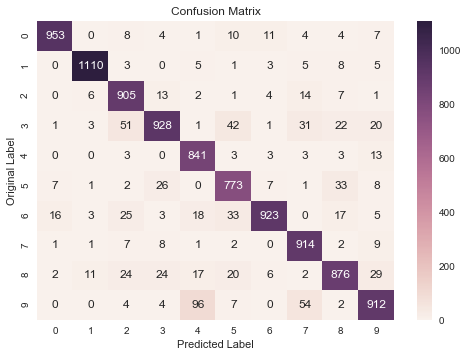

In [49]:
plot_confusion_matrix(pred_predict,test_df_label)

In [50]:
h2o.shutdown() #h2o shutdown

[WARNING] in <ipython-input-50-bd1e984f485f> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_9cdf closed.
